In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### X:범주형 / Y:연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목 2), amount(비정규분포) - Wilcoxon Test
- 분석 내용 : channel 중 서비스방문과 홈쇼핑에 따른 월 렌탈 비용 평균이 차이가 있는가 ?
    - 귀무가설 : 비용 평균에 차이 없다.
    - 대립가설 : 비용 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.0, 대립가설이 참.
    - 사실 결론 : 비용 평균에 차이 있다.

<AxesSubplot:xlabel='channel', ylabel='count'>

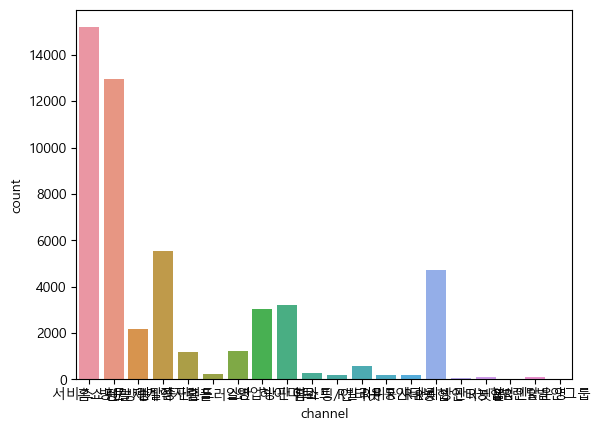

In [3]:
sns.countplot(data=df_TOCC, x='channel')

In [4]:
df_TOCC['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [11]:
## 검증 대상 항목만 필터링 and 추출
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_amount = df_TOCC[condition][['channel','amount']]
df_channel_amount[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


In [12]:
## check null
df_channel_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 0 to 51301
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  28163 non-null  object
 1   amount   28163 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 660.1+ KB


##### 5천 건 이상 anderson test : 정규 분포 검증

In [16]:
## statistic < cv : 정규분포, statistic > cv : 비정규분포
statistic, cv, sl = stats.anderson(df_channel_amount['amount'])
statistic, cv, sl  # 비정규분포

(1292.5765966678264,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

<AxesSubplot:xlabel='amount', ylabel='Count'>

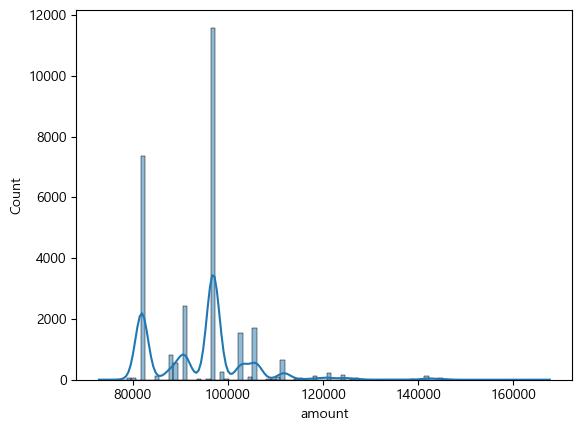

In [17]:
sns.histplot(df_channel_amount, x='amount', kde=True)

##### 범주형 항목 따라 검증 : 2개 항목

In [21]:
df_channel_amount['channel'].value_counts()

서비스 방문    15186
홈쇼핑/방송    12977
Name: channel, dtype: int64

In [31]:
df_service = df_channel_amount[df_channel_amount['channel'] == '서비스 방문']
df_service[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


In [32]:
df_homeshopping = df_channel_amount[df_channel_amount['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,amount
2,홈쇼핑/방송,96900
6,홈쇼핑/방송,98400


In [33]:
# 검증
stats.ranksums(df_service['amount'], df_homeshopping['amount'])

RanksumsResult(statistic=74.731078009603, pvalue=0.0)

#### 선정 변수 : channel(항목 3), amount(비정규분포) - Kruskal Test
- 분석 내용 : 
    - 귀무가설 : 
    - 대립가설 : 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립 가설이 참
    - 사실 결론 : 

<AxesSubplot:xlabel='amount', ylabel='Count'>

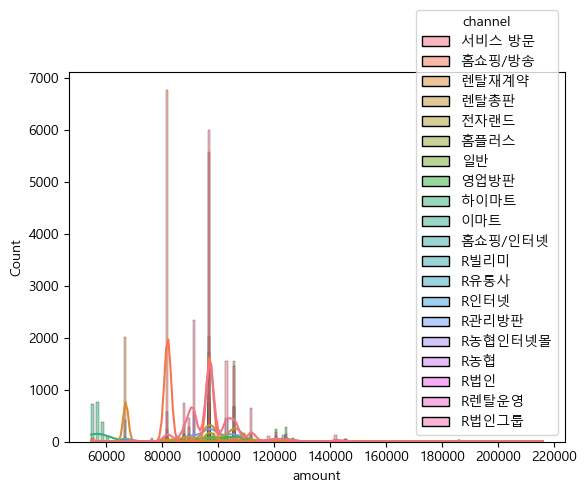

In [3]:
sns.histplot(data=df_TOCC, x='amount', kde=True, hue='channel')

In [6]:
df_TOCC['channel'].value_counts()[:5]

서비스 방문    15186
홈쇼핑/방송    12977
렌탈총판       5544
R관리방판      4727
하이마트       3227
Name: channel, dtype: int64

In [19]:
conditions = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송') | (df_TOCC['channel'] == '렌탈총판') | (df_TOCC['channel'] == 'R관리방판') 
conditions    
df_channel4_amount = df_TOCC[conditions][['channel', 'amount']]  # 필터링과 축출 동시에 함.

In [20]:
df_channel4_amount.isnull().sum()

channel    0
amount     0
dtype: int64

In [21]:
#df_channel4_amount = df_channel4_amount.dropna()
df_channel4_amount[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


##### 정규성 확인
- 5천이상이므로 anderson test 사용
- statistic < cv : 정규, statistic > cv : 비정규

<AxesSubplot:xlabel='amount', ylabel='Count'>

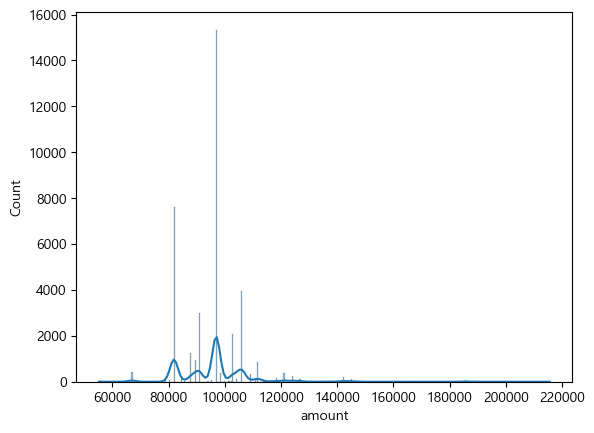

In [22]:
sns.histplot(data=df_channel4_amount, x='amount', kde=True)

In [24]:
statistic, cv, sl = stats.anderson(df_channel4_amount['amount'])
statistic, cv, sl

(1476.100903137849,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

##### 범주형 항목 3개 이상일 때 검증

In [36]:
#type(df_channel4_amount['channel'].value_counts())
channel_list = df_channel4_amount['channel'].value_counts().index.to_list()
channel_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판']

In [40]:
df_result = [] # list()
for item in channel_list :
    condition = (df_channel4_amount['channel'] == item)
    df_result.append(df_channel4_amount[condition])   # list index에 DataFrame
    # df_result.append(df_channel4_amount[condition]['amount'])   # list index에 Serise    

In [46]:
#len(df_result)
df_result[3][:2]

,channel,amount
1339,R관리방판,66900
3655,R관리방판,66900


In [47]:
### 검증 각 변수 4개 
stats.kruskal(df_result[0]['amount'], df_result[1]['amount'], df_result[2]['amount'], df_result[3]['amount'])

KruskalResult(statistic=8271.821667245342, pvalue=0.0)